In [1]:
#!/usr/bin/python3
# coding: utf-8

# This is a jupyter notebook file of a script that creates scatterplots of Martin2015 data.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reads in Martin2015_data.csv and converts the file to a dataframe. 
# Empty values that are just spaces are converted to NaN values.
Martin2015_df = pd.read_csv(
    "Martin2015_data.csv", sep="\t", on_bad_lines="warn", na_values=" "
)

In [4]:
# taking a peek at the dataframe
Martin2015_df

,species,nstldpr,nstl,krate,kwing,PropWCfldg,Propmassfldg,trips,tripsnstl,cs,armort,lmas,aerial,regurg,site
0,Empidonax_occidentalis,0.030200,15.04500,0.427354,0.281768,0.690399,1.052978,19.947,6.136000,3.880,0.412608,1.037426,1,0,1
1,Vireo_plumbeus,0.042200,13.40000,0.475550,0.307878,NaN,NaN,7.104,2.921000,3.260,NaN,1.225309,0,0,1
2,Vireo_gilvus,0.021600,13.43700,0.490115,0.272989,0.652174,0.985603,10.903,3.502992,3.660,0.500958,1.099076,0,0,1
3,Parus_gambeli,0.007381,21.35714,0.359629,0.230178,0.850061,1.059197,19.818,3.768000,6.580,0.517835,1.062556,0,0,1
4,Turdus_migratorius,0.030100,14.66700,0.499906,0.316170,0.604293,0.785692,6.229,1.884000,3.340,0.502936,1.888179,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Ficedula_hyperythra,0.043581,14.50000,0.448448,0.299120,0.759293,1.103021,14.246,8.084000,1.971,0.250987,0.931204,1,0,3
68,Brachypteryx_montana,0.046250,18.28600,0.405766,0.282691,0.837554,0.953782,5.718,3.056000,1.951,0.210890,1.314101,0,1,3
69,Rhinomyias_gularis,0.029312,14.70000,0.407199,0.302993,0.681318,0.949275,5.415,2.983000,1.971,0.282305,1.420170,0,0,3
70,Eumyias_indigo,0.026012,17.80000,0.391581,0.292940,0.738877,1.011704,8.628,4.730000,1.926,0.181393,1.201422,0,0,3


In [5]:
# changing the values of "1", "2", and "3" in the site column to correspond to the actual sites
Martin2015_df["site"] = Martin2015_df["site"].replace(
    [1, 2, 3], ["Arizona - temperate", "Venezuela - tropical", "Malaysia - tropical"]
)

In [6]:
# checking to make sure the values were changed correctly
Martin2015_df["site"]

0     Arizona - temperate
1     Arizona - temperate
2     Arizona - temperate
3     Arizona - temperate
4     Arizona - temperate
             ...         
67    Malaysia - tropical
68    Malaysia - tropical
69    Malaysia - tropical
70    Malaysia - tropical
71    Malaysia - tropical
Name: site, Length: 72, dtype: object

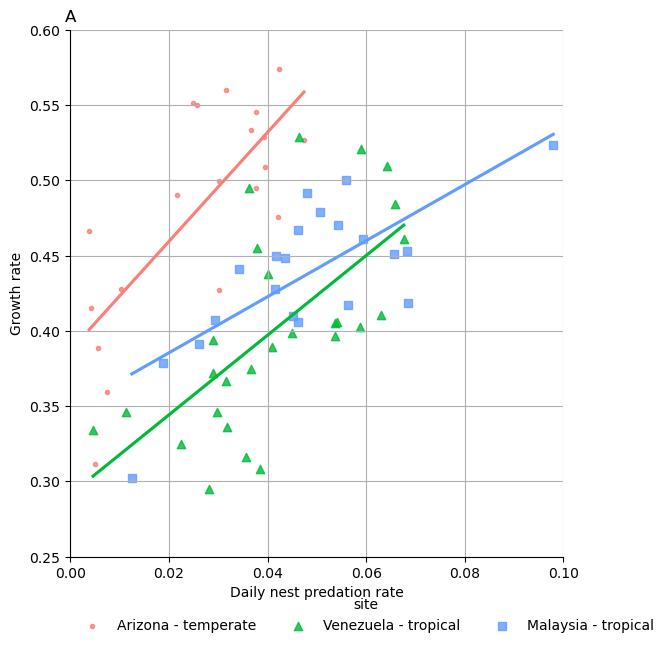

In [7]:
def make_plot_A():
    """Creates a scatter plot of Daily nest predation rate by Growth rate from the Martin2015_df dataframe.
    Saves the graph as "Martin_FigureA.png" in the current working directory."""
    # creates the color palette and stores it in a variable
    colors = sns.color_palette(["#F88078", "#00BA38", "#619CFF"])
    # creates the figure
    ga = sns.lmplot(data=Martin2015_df, x="nstldpr", y="krate", hue="site", palette=colors,
        markers=[".", "^", "s"], ci=None, height=6)
    # sets axes limits
    ga.set(xlim=(0.000, 0.100), ylim=(0.25, 0.6))
    # adds labels
    plt.title("A", x=0)
    plt.ylabel("Growth rate")
    plt.xlabel("Daily nest predation rate")
    # reformats the legend
    sns.move_legend(ga, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=4)
    # adds gridlines
    plt.grid(axis="both")
    # saves the figure in the current working directory
    plt.savefig("Martin_FigureA.png", orientation="portrait", bbox_inches="tight")
    
make_plot_A()
plt.show()

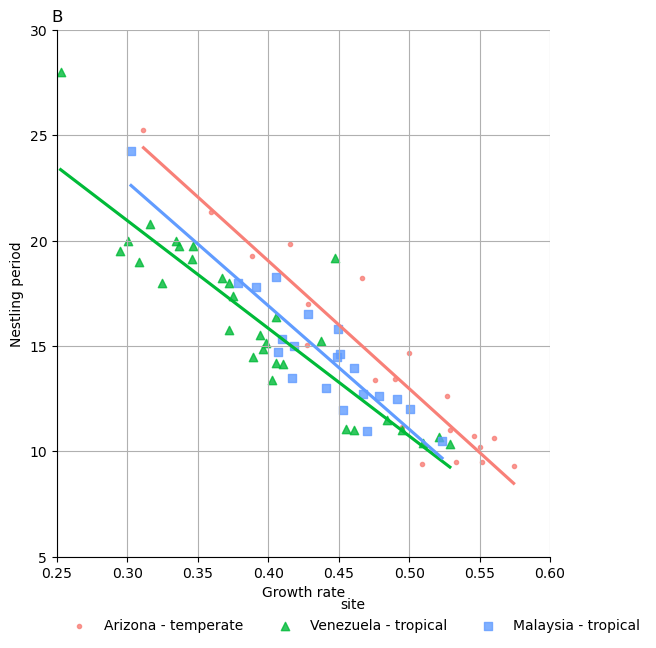

In [8]:
def make_plot_B():
    """Creates a scatter plot of Growth rate by Nestling period from the Martin2015_df dataframe. 
    Saves the graph as "Martin_FigureB.png" in the current working directory."""
    # creates the color palette and stores it in a variable
    colors = sns.color_palette(["#F88078", "#00BA38", "#619CFF"])
    # creates the figure
    gb = sns.lmplot(
        data=Martin2015_df,
        x="krate",
        y="nstl",
        hue="site",
        palette=colors,
        markers=[".", "^", "s"],
        ci=None,
        height=6,
    )
    # sets axes limits
    gb.set(xlim=(0.25, 0.6), ylim=(5, 30))
    # adds labels
    plt.title("B", x=0)
    plt.ylabel("Nestling period")
    plt.xlabel("Growth rate")
    # changes legend information
    sns.move_legend(gb, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=4)
    # adds gridlines
    plt.grid(axis="both")
    # saves the figure in the current working directory
    plt.savefig("Martin_FigureB.png", orientation="portrait", bbox_inches="tight")
    
make_plot_B()
plt.show()